# Aplicando filtros IIR e MA | COVID-19

Applied to number of deaths and infected in Brazil

Made by: Alexandre Russi Jr.

Personal website: https://www.alexandrerussi.com/

## Imports

In [145]:
import numpy as np
import pandas as pd
import scipy.signal as signal


import matplotlib.pyplot as plt
%matplotlib inline

## Dataset

In [146]:
df = pd.read_excel('HIST_PAINEL_COVIDBR_06set2020.xlsx')
df

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920903,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-09-02,36,3015268.0,164649,1151,2609,36,NaN,NaN,1.0
920904,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-09-03,36,3015268.0,165903,1254,2641,32,NaN,NaN,1.0
920905,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-09-04,36,3015268.0,167200,1297,2681,40,NaN,NaN,1.0
920906,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-09-05,36,3015268.0,168605,1405,2700,19,NaN,NaN,1.0


In [147]:
index = df.index
index

RangeIndex(start=0, stop=920908, step=1)

In [148]:
columns = df.columns
columns

Index(['regiao', 'estado', 'municipio', 'coduf', 'codmun', 'codRegiaoSaude',
       'nomeRegiaoSaude', 'data', 'semanaEpi', 'populacaoTCU2019',
       'casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos',
       'Recuperadosnovos', 'emAcompanhamentoNovos', 'interior/metropolitana'],
      dtype='object')

## Análise de casos acumulados no Brasil

In [149]:
df_br = df.loc[df['regiao'] == 'Brasil']
df_br

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-09-02,36,210147125.0,3997865,46934,123780,1184,3210405.0,663680.0,NaN
191,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-09-03,36,210147125.0,4041638,43773,124614,834,3247610.0,669414.0,NaN
192,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-09-04,36,210147125.0,4092832,51194,125521,907,3278918.0,688393.0,NaN
193,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-09-05,36,210147125.0,4123000,30168,126203,682,3296702.0,700095.0,NaN


In [150]:
df_br = df_br[['data', 'casosAcumulado']]
df_br

,data,casosAcumulado
0,2020-02-25,0
1,2020-02-26,1
2,2020-02-27,1
3,2020-02-28,1
4,2020-02-29,2
...,...,...
190,2020-09-02,3997865
191,2020-09-03,4041638
192,2020-09-04,4092832
193,2020-09-05,4123000


### Calculando média móvel de 5 dias e de 30 dias.

In [151]:
df_br['SMA_5'] = df_br.iloc[:,1].rolling(window=5).mean()
df_br['SMA_30'] = df_br.iloc[:,1].rolling(window=30).mean()

df_br

C:\Users\Junior\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Junior\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,data,casosAcumulado,SMA_5,SMA_30
0,2020-02-25,0,NaN,NaN
1,2020-02-26,1,NaN,NaN
2,2020-02-27,1,NaN,NaN
3,2020-02-28,1,NaN,NaN
4,2020-02-29,2,1.0,NaN
...,...,...,...,...
190,2020-09-02,3997865,3913106.4,3.421978e+06
191,2020-09-03,4041638,3952203.4,3.463302e+06
192,2020-09-04,4092832,3998307.6,3.504477e+06
193,2020-09-05,4123000,4041253.2,3.544836e+06


Gráfico de casos acumulados de COVID-19 por data de notificação com médias móveis de 5 dias e 30 dias.

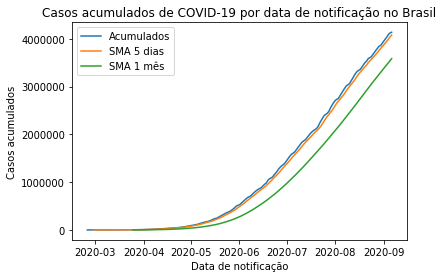

In [152]:
plt.plot(df_br['data'], df_br['casosAcumulado'], label='Acumulados')
plt.plot(df_br['data'], df_br['SMA_5'], label='SMA 5 dias')
plt.plot(df_br['data'], df_br['SMA_30'], label='SMA 1 mês')
plt.title('Casos acumulados de COVID-19 por data de notificação no Brasil')
plt.xlabel('Data de notificação')
plt.ylabel('Casos acumulados')
plt.legend(loc='best')
plt.show()

In [158]:
df_br.to_excel('casos_acumulados_covid19_sma.xlsx', index=False)

### Aplicando filtro IIR (Resposta ao Impulso Infinito) 

In [159]:
df_csv = df_br['casosAcumulado']
df_csv.to_csv('casos_acumulados.csv', sep=',', index=False)

## Análise de óbitos acumulados no Brasil

In [160]:
df_br_ob = df.loc[df['regiao'] == 'Brasil']
df_br_ob = df_br_ob[['data', 'obitosAcumulado']]
df_br_ob

,data,obitosAcumulado
0,2020-02-25,0
1,2020-02-26,0
2,2020-02-27,0
3,2020-02-28,0
4,2020-02-29,0
...,...,...
190,2020-09-02,123780
191,2020-09-03,124614
192,2020-09-04,125521
193,2020-09-05,126203


In [161]:
df_br_ob['SMA_5'] = df_br_ob.iloc[:,1].rolling(window=5).mean()
df_br_ob['SMA_30'] = df_br_ob.iloc[:,1].rolling(window=30).mean()

df_br_ob

,data,obitosAcumulado,SMA_5,SMA_30
0,2020-02-25,0,NaN,NaN
1,2020-02-26,0,NaN,NaN
2,2020-02-27,0,NaN,NaN
3,2020-02-28,0,NaN,NaN
4,2020-02-29,0,0.0,NaN
...,...,...,...,...
190,2020-09-02,123780,121809.4,110321.100000
191,2020-09-03,124614,122639.8,111280.933333
192,2020-09-04,125521,123578.4,112223.633333
193,2020-09-05,126203,124542.8,113147.300000


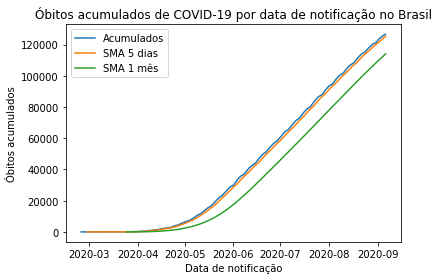

In [162]:
plt.plot(df_br_ob['data'], df_br_ob['obitosAcumulado'], label='Acumulados')
plt.plot(df_br_ob['data'], df_br_ob['SMA_5'], label='SMA 5 dias')
plt.plot(df_br_ob['data'], df_br_ob['SMA_30'], label='SMA 1 mês')
plt.title('Óbitos acumulados de COVID-19 por data de notificação no Brasil')
plt.xlabel('Data de notificação')
plt.ylabel('Óbitos acumulados')
plt.legend(loc='best')
plt.show()